In [1]:
# Reading in neccessary packages
import pandas as pd
import numpy as np
from project_functions.analysis_functions import plot, mse, transform, saveModel, loadModel, modelTraining, createUsableDF, score, boostModel

# This package only neccessary if you would like to re-download the data int the nexyt
# import yahoo_finance as yf

In [2]:
# object = yf.Ticker('JWN')
# data = object.history(start="2000-01-01", end="2020-11-17")
# data.to_csv('Data/Raw Data/nordstrom.csv')
data = pd.read_csv('Data/Raw Data/nordstrom.csv', index_col='Date')

In [3]:
# This defines the numpy of days in the past we will use to predict the current price
LAG = 40

In [4]:
xTrain, yTrain, xTest, yTest, scaler = transform(data, LAG)

In [5]:
# model = modelTraining(2000, 10)
# saveModel(model, "fordRealModel", location='Data/Final Models')
model = loadModel(name="nordstromModel", location='Data/Final Models')

MSE Train: 0.534805262810811
MSE Test: 1.4801148246212157


C:\Users\Aidan\Documents\GitRepositories\cmpt-353-stock-market-predictor\project_functions\analysis_functions.py:211: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


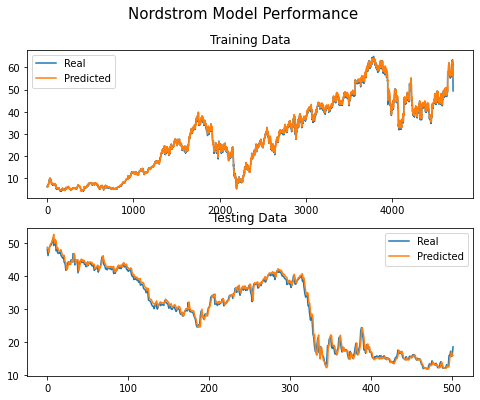

In [6]:
mseTrain, trainPreds, trainTruth = mse(xTrain,yTrain, model, scaler)
print("MSE Train:", mseTrain)

mseTest, testPreds, testTruth = mse(xTest,yTest, model, scaler)

print("MSE Test:", mseTest)

plot(trainTruth, trainPreds, testTruth, testPreds, 'Nordstrom Model Performance')

Looking at the above results, we can see reasonable performance, though clearly not as good as we saw with Forward Industries.  However this is not particularly surprising.  Lets see how often we guess correctly.

In [7]:
tradingActionsTrain, tradingActionsTest = createUsableDF(data,scaler, model)

In [8]:
print("Training Score:", score(tradingActionsTrain.copy()))
print("Test Score:", score(tradingActionsTest.copy()))

Training Score: 0.5230312035661219
Test Score: 0.4800796812749004


We can see that we are actually performing worse than if we simply guessed.  Lets see if we can boost it.

In [12]:
boostModel(tradingActionsTrain, tradingActionsTest)

,Open,residuals,predicted,tomorrow,action,movingResidual,predictedTomorrow,trueTomorrow,trueAction
Date,,,,,,,,,
2018-11-19,48.102972,0.586463,48.689434,48.347031,sell,0.447273,47.899757,46.139388,sell
2018-11-20,46.139388,2.207642,48.347031,47.102261,buy,0.439206,46.663054,48.084176,buy
2018-11-21,48.084176,-0.981916,47.102261,48.796135,buy,0.453737,48.342398,48.899676,buy
2018-11-23,48.899676,-0.103541,48.796135,49.656254,buy,0.441257,49.214996,49.126763,buy
2018-11-26,49.126763,0.529491,49.656254,49.956898,buy,0.431767,49.525131,49.476864,buy
...,...,...,...,...,...,...,...,...,...
2020-11-10,16.049999,-0.691251,15.358748,15.962839,sell,0.069522,15.893317,17.290001,buy
2020-11-11,17.290001,-1.327162,15.962839,17.212732,sell,0.050056,17.162676,15.710000,sell
2020-11-12,15.710000,1.502732,17.212732,15.873622,buy,0.028213,15.845409,16.040001,buy


In [13]:
print(score(tradingActionsTest))

0.5517928286852589


We have managed to increase the accuracy of our model by 7 percent!

In [14]:
tradingActionsFinal = tradingActionsTest[['Open', 'predictedTomorrow', 'action']]
tradingActionsFinal = tradingActionsFinal.rename(columns={'action':'predictedAction'})
tradingActionsFinal['stock'] = 'nordstrom'
tradingActionsFinal

,Open,predictedTomorrow,predictedAction,stock
Date,,,,
2018-11-19,48.102972,47.899757,sell,nordstrom
2018-11-20,46.139388,46.663054,buy,nordstrom
2018-11-21,48.084176,48.342398,buy,nordstrom
2018-11-23,48.899676,49.214996,buy,nordstrom
2018-11-26,49.126763,49.525131,buy,nordstrom
...,...,...,...,...
2020-11-10,16.049999,15.893317,sell,nordstrom
2020-11-11,17.290001,17.162676,sell,nordstrom
2020-11-12,15.710000,15.845409,buy,nordstrom


In [15]:
tradingActionsFinal = tradingActionsTest[['Open', 'predictedTomorrow', 'action']]
tradingActionsFinal = tradingActionsFinal.rename(columns={'action':'predictedAction'})
tradingActionsFinal['predicted'] = tradingActionsFinal['predictedTomorrow'].shift(1)
tradingActionsFinal['stock'] = 'nordstrom'
tradingActionsFinal

,Open,predictedTomorrow,predictedAction,predicted,stock
Date,,,,,
2018-11-19,48.102972,47.899757,sell,NaN,nordstrom
2018-11-20,46.139388,46.663054,buy,47.899757,nordstrom
2018-11-21,48.084176,48.342398,buy,46.663054,nordstrom
2018-11-23,48.899676,49.214996,buy,48.342398,nordstrom
2018-11-26,49.126763,49.525131,buy,49.214996,nordstrom
...,...,...,...,...,...
2020-11-10,16.049999,15.893317,sell,15.268183,nordstrom
2020-11-11,17.290001,17.162676,sell,15.893317,nordstrom
2020-11-12,15.710000,15.845409,buy,17.162676,nordstrom


In [16]:
tradingActionsFinal.to_csv('Data/Final Predictions/nordstromComplete.csv')